**Installing of all neccessary modules**

In [1]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%pip install accelerate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
%pip install diffusers

Defaulting to user installation because normal site-packages is not writeable
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from diffusers import DiffusionPipeline
import torch
import os

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

***User's promt***

In [3]:
compressed_text = '''prompt:'Max Climtock is with you and this show is the right price! Participants earn points by guessing the right prices of goods and services. You can also pay your price for watching the show - to put a yike, to sign'''
keywords = '''Max Climtock, price, Dana Boom, Ruslan Hard to understand, Elizabeth Bendas, yike, sign on to the channel, comment'''

**Build pretrained model using specific style**

In [4]:
pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16)
# pipeline.load_lora_weights("nerijs/pixel-art-xl")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

2023-10-15 04:08:14.136793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


**Make request**

In [5]:
pipeline.to("cuda")
image = pipeline(f'promt:{compressed_text}; keywords:{keywords}', negative_prompt='ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, watermark, grainy, signature, cut off, draft').images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (87 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['yike, sign on to the channel, comment']
Token indices sequence length is longer than the specified maximum sequence length for this model (87 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['yike, sign on to the channel, comment']


  0%|          | 0/50 [00:00<?, ?it/s]

**Other**

In [11]:
os.stat('./out.jpg').st_size / 1024 / 1024

0.2087383270263672

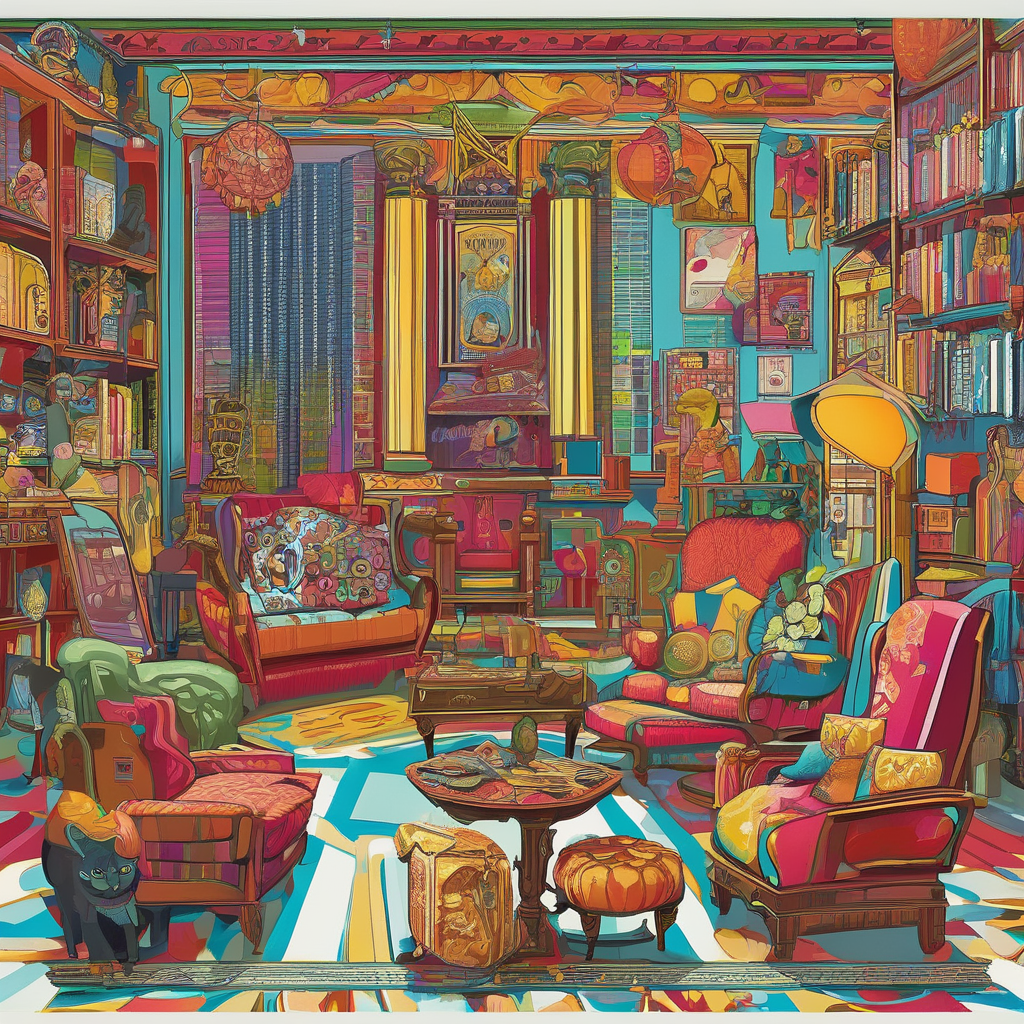

In [6]:
image

In [10]:
image.save('./out.jpg')